# ZTM Section 9 Scikit Learn

In [ ]:
#get the data ready

import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

In [ ]:
#creat x (feature matrix)
x = heart_disease.drop('target', axis = 1)
x

In [ ]:
#create y(label)
y = heart_disease['target']
y

In [79]:
#choose the right model and hyperparameters(dails to tune)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#checking the hyperparameter randomforest holds
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#splting the dataset in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

In [ ]:
#fit model to the traning data
clf.fit(x_train, y_train);

In [ ]:
#testing the model
import numpy as np
y_preds = clf.predict(x_test)
y_preds

In [ ]:
y_test

In [ ]:
#evaluate the model
clf.score(x_train, y_train)

In [ ]:
clf.score(x_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

In [ ]:
print(confusion_matrix(y_test, y_preds))

In [ ]:
print(accuracy_score(y_test, y_preds))

In [ ]:
# improve the model
#here by tweeking a hyperparameter called 'n_estmators' to diffrent number to check the diffrent accuracy score of the model.
np.random.seed(42)
for i in range (10, 100, 10):
    print(f'trying model with {i} estimators')
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(x_train, y_train)
    y_preds = clf.predict(x_test)
    print(f'model accuracy is {clf.score(x_test, y_test)*100: .2f}%')

In [ ]:
#saving the model to be fasst fast
import pickle
pickle.dump(clf, open('randomForestClassifier1.pkl', 'wb'))

In [ ]:
load_model = pickle.load(open('randomForestClassifier1.pkl', 'rb'))
f'{load_model.score(x_test, y_test)*100: .2f}%'

# Cleaning and preprocessing of data

In [ ]:
import pandas as pd
car_sales = pd.read_csv('car-sales.csv')
car_sales.head()

In [ ]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

In [ ]:
#spliting the data into features(x) and labels(y)
x = heart_disease.drop('target', axis = 1)
x

In [ ]:
y = heart_disease['target']
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# trying out with another dataset which actually have missing values
car_sales = pd.read_csv('data/car-sales-extended.csv')
len(car_sales)

In [ ]:
car_sales.head()

In [ ]:
#split x and y 
x = car_sales.drop('Price', axis = 1)
len(x)

In [ ]:
y = car_sales['Price']
len(y)

In [ ]:
#splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
x_train.head()

In [ ]:
#converting the data into nuerical(label encoding for the categorical data)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transform = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
tranformed_x_train = transform.fit_transform(x_train)
type(tranformed_x_train)

In [ ]:
tranformed_x_train_df = pd.DataFrame(tranformed_x_train)
tranformed_x_train_df.head()

In [ ]:
#2nd way to do it is using pandas's dummies for label encoding
dummies = pd.get_dummies(x_train[['Make', 'Colour', 'Doors']], dtype='float')
dummies.head()

In [ ]:
#splitting them into again x and y and remeber this x_transformed is x_train so dnt get confused
x_train, x_test, y_train, y_test = train_test_split(tranformed_x_train, y_train, test_size=0.2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.predict(x_test)

In [ ]:
model.score(x_train, y_train), model.score(x_test, y_test)

# hanelling missing values

In [1]:
import pandas as pd
car_data = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [2]:
# to calculate missing values

car_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [3]:
car_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [4]:
car_data['Doors'].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

### filling missing values with Pandas

In [5]:
#handelling mising values
car_data['Make'].fillna('Missing', inplace=True)
car_data['Colour'].fillna('Missing', inplace=True)
car_data['Odometer (KM)'].fillna(car_data['Odometer (KM)'].mean(), inplace=True)
car_data['Doors'].fillna(4.0, inplace=True)


In [6]:
car_data.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [7]:
car_data.dropna(inplace = True)
car_data.shape

(950, 5)

In [8]:
car_data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transform = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
x_transformed = transform.fit_transform(car_data)

In [25]:
x_transformed_df = pd.DataFrame(x_transformed)
x_transformed_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0,4001.0


In [26]:
# label encoding with pandas
import pandas as pd
dummies = pd.get_dummies(car_data, columns=['Doors', 'Make', 'Colour'], dtype='float')

In [27]:
dummies

,Odometer (KM),Price,Doors_3.0,Doors_4.0,Doors_5.0,Make_BMW,Make_Honda,Make_Missing,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Missing,Colour_Red,Colour_White
0,35431.0,15323.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,192714.0,19943.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,84714.0,28343.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,154365.0,13434.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,181577.0,14043.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35820.0,32042.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
996,155144.0,5716.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,66604.0,31570.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
998,215883.0,4001.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
x = car_data.drop('Price', axis=1)
y = car_data['Price']
x.shape, y.shape

((950, 4), (950,))

### filling missing values with sklearn

In [33]:
import pandas as pd

car_selling_data = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_selling_data.shape

(1000, 5)

In [37]:
car_selling_data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [36]:
car_selling_data.dropna(subset='Price', inplace=True)
car_selling_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [39]:
x = car_selling_data.drop('Price', axis =1)
y = car_selling_data['Price']

In [44]:
#using simple imputer to fill the NaN and using CoColumnTransformer to aplly it to column
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

categorical_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
numerical_imputer = SimpleImputer(strategy='mean')
consant_imputer = SimpleImputer(strategy='constant', fill_value=4)

categorical_values = ['Make', 'Colour']
numerical_values = ['Odometer (KM)']
constant_values = ['Doors']

transform = ColumnTransformer([('categorical_imputer', categorical_imputer, categorical_values),
                              ('numerical_imputer', numerical_imputer, numerical_values),
                             ('constant_imputer', consant_imputer, constant_values)])

x_filled = transform.fit_transform(x)
x_filled

array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [54]:
x_filled_df = pd.DataFrame(x_filled, columns=['Make', 'Colour', 'Odometer (KM)', 'Doors'])
x_filled_df.isna().sum()


Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [55]:
x_filled_df.shape, y.shape

((950, 4), (950,))

In [56]:
x_filled_df

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
945,Toyota,Black,35820.0,4.0
946,Missing,White,155144.0,3.0
947,Nissan,Blue,66604.0,4.0
948,Honda,White,215883.0,4.0


In [62]:
# using onehot and columntransfromer to convert the filled df to numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
categorical_types = ['Make', 'Doors', 'Colour']
transformm = ColumnTransformer([('one_hot', one_hot, categorical_types)], remainder = 'passthrough')
x_transformed_num = transformm.fit_transform(x_filled_df)

pd.DataFrame(x_transformed_num)

,0
0,"(0, 1)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 7)\t1.0\n (0, 9)\t1.0\n ..."
2,"(0, 1)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
3,"(0, 4)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
4,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 9)\t1.0\n ..."
...,...
945,"(0, 4)\t1.0\n (0, 6)\t1.0\n (0, 8)\t1.0\n ..."
946,"(0, 2)\t1.0\n (0, 5)\t1.0\n (0, 13)\t1.0\n..."
947,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 9)\t1.0\n ..."
948,"(0, 1)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(x_transformed_num, y, test_size=0.2)

In [73]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((760, 15), (190, 15), (760,), (190,))

In [74]:
model = RandomForestRegressor()

model.fit(x_train, y_train)

RandomForestRegressor()

In [75]:
model.predict(x_test)

array([ 9987.23      , 10584.62      , 12297.7445    , 19735.95      ,
       18480.49487302, 21103.32      , 15119.91      , 15684.88738095,
       21063.75      ,  5618.03      , 18480.49487302, 13595.18      ,
       14413.38855556, 10628.7       , 19767.45      , 10818.71      ,
       25741.09      , 10987.19      ,  9507.87      ,  9982.97      ,
        8746.19      , 12620.53910119, 10580.165     , 17825.7       ,
       19756.63      ,  9667.3       , 13380.16      , 27617.66      ,
       22914.47      , 13840.47      , 13779.4       , 17398.6       ,
       15283.88      ,  9400.09      , 11529.67      , 40338.94      ,
       36585.88      , 10511.        , 13225.37      , 33944.11      ,
       14556.68      , 13113.03008333, 18480.49487302, 12177.92      ,
       11571.74      , 16944.61      , 12815.55      , 18131.94      ,
       21351.55      , 11553.79      , 15731.65      , 17719.02      ,
       11508.41      , 19317.04      , 17465.7       , 14734.09      ,
      

In [76]:
model.score(x_train, y_train)

0.8848368322267451

In [77]:
model.score(x_test, y_test)

0.11676427280021984

In [80]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Choosing the right model

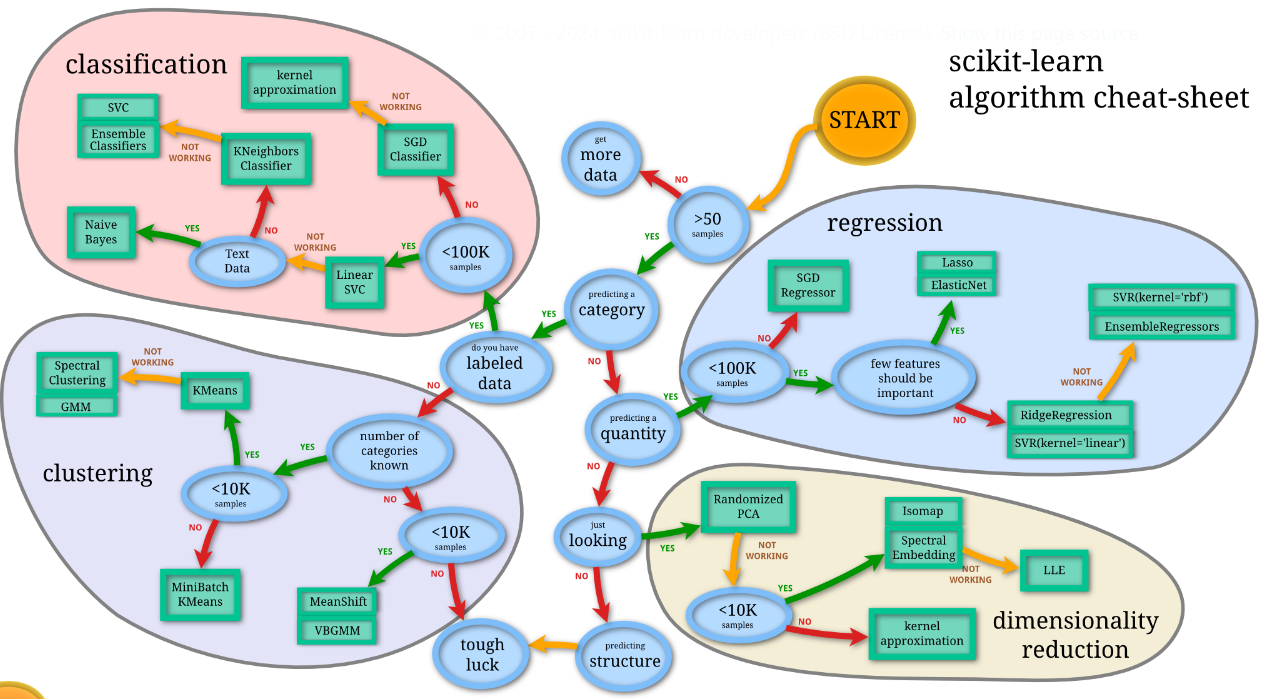

california housing dataset by sklearn :- https://scikit-learn.org/stable/datasets/real_world.html

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [90]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
import pandas as pd
housing_data = pd.DataFrame(housing['data'], columns = housing['feature_names'])

In [96]:
housing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
housing_data['target'] = housing['target']

In [100]:
housing_data.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [102]:
x = housing_data.drop('target', axis = 1)
y = housing_data['target']
x.shape, y.shape

((20640, 8), (20640,))

In [107]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [109]:
#trying first model according to cheatsheet
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [110]:
model = Ridge()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6109317497088524

In [112]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
model.score(x_test, y_test)

-0.02202278698082938

In [115]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.29063625905414125

In [10]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x = housing_data.drop('target', axis = 1)
y = housing_data['target']

In [11]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

In [3]:
np.random.seed(42)
x_tain, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_tain.shape, x_test.shape, y_train.shape, y_test.shape

NameError: name 'x' is not defined

In [15]:
model = RandomForestRegressor()
model.fit(x_tain, y_train)
model.score(x_test, y_test)

0.8065734772187598

# classification problem

In [2]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'Petal_width'])
iris_df


,SepalLength,SepalWidth,PetalLength,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
iris_df['target'] = iris['target']
iris_df.head()

,SepalLength,SepalWidth,PetalLength,Petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
Petal_width    0
target         0
dtype: int64

In [5]:
x = iris_df.drop(['target'], axis = 1)
y = iris_df['target']
x.shape, y.shape

((150, 4), (150,))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = SGDClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7666666666666667

tip:
 1. if you have structured data and accuracy is really low used `ensemble models` like `RandomForestRegressor` or `RandomForestClassifier`.
 2. if you have unstructed data and accuracy is low used `deepLearning` or `transferedLearning`.

# Fit the model to the data

2 ways to predict:
  1. `model.predict`
  2. `model.predict_proba`

In [11]:
y_preds = model.predict(x_test)
y_preds

array([2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [9]:
np.array(y_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [12]:
np.mean(y_preds == y_test)

0.7666666666666667

In [13]:
model.score(x_test, y_test)

0.7666666666666667

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.7666666666666667

predicting with `predict_proba`

In [27]:
# model.predict_proba(y_test)
# as the dataset target have multiple values the predict_proba is not working

# the predict_proba looks like 
# [[0.44, 0.56],
# [0.22, 0.78],
# [1.02, 0.98]]

In [28]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)
#to find the error 

0.23333333333333334

# Evaluting the model predictions

there are three ways to evaluate a classifier
1. by `.score()`
2. by `scoring parameter` cross_validation
3. problem specific mettric functon

In [1]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv('data/heart-disease.csv')

In [2]:
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn .model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [4]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_preds = model.predict(x_test)

model.score(x_test, y_test)

0.8524590163934426

In [5]:
model.score(x_train, y_train)

1.0

In [21]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(model, x, y, cv =5)

array([0.83606557, 0.90163934, 0.81967213, 0.83333333, 0.78333333])

In [28]:
# measuring normal one score vs cross validation score
model.score(x_test, y_test), np.mean(a)

(0.8688524590163934, 0.8248087431693989)

## classification model evaluaction metrics
1. accuracy
2. area under ROC curve
3. confusion matrix
4. classification report

**Accuracy**

In [9]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model, x, y, cv = 5)

In [11]:
np.mean(cvs)

0.8183606557377049

1. **Area under curve**,
2. **ROC Curve (Reciver Operatinng Characteristic Curve)**

ROC/AOC is the represeentation of the comparison of True Postive rate (TPR) and False Positive rate (TPR)

* True Positive = model predicts 1 when truth is actually 1
* False Positive = model predicts 1 when truth is actually 0
* True Negetive = model predicts 0 when truth is actually 0
* False Negetive = model predicts 0 when truth is actually 1

In [22]:
y_preds = model.predict_proba(x_test)
len(y_preds)


61

In [25]:
y_preds_positive = y_preds[:,1]

In [33]:
y_preds_positive.shape

(61,)

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_preds_positive)

In [35]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [34]:
tpr

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

In [38]:
threshold

array([ inf, 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
       0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
       0.06, 0.05, 0.  ])

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_preds_positive)

0.9304956896551724

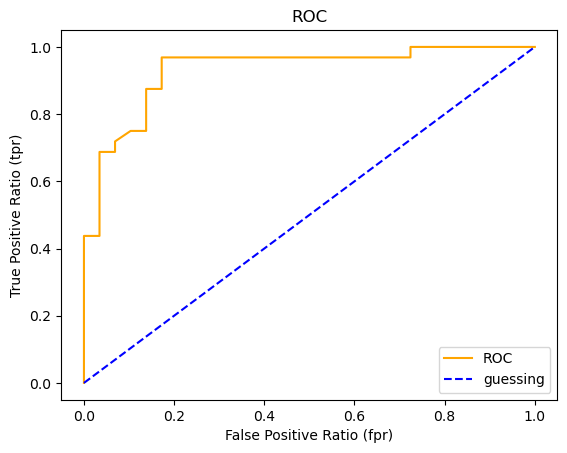

In [46]:
import matplotlib.pyplot as plt

def plot_ROC_curve(fpr, tpr):
 plt.plot(fpr, tpr, color = 'orange', label = 'ROC');
 plt.plot([0,1], [0,1], color = 'blue', linestyle = "--", label = 'guessing')
 plt.xlabel('False Positive Ratio (fpr)')
 plt.ylabel('True Positive Ratio (tpr)')
 plt.title('ROC')
 plt.legend()

plot_ROC_curve(fpr, tpr)

## confusion matrix
it is the fast way to compare labels of model's pridict and labels which are real expected values 

In [17]:
from sklearn.metrics import confusion_matrix
y_preds = model.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [18]:
pd.crosstab(y_test, y_preds, rownames=['actual_label'], colnames=['predict_label'])

predict_label,0,1
actual_label,,
0,24,5
1,4,28


In [19]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn


Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [20]:
import seaborn as sns

sns.set(font_scale = 1.5)
cm = confusion_matrix(y_test, y_preds)

<Axes: >

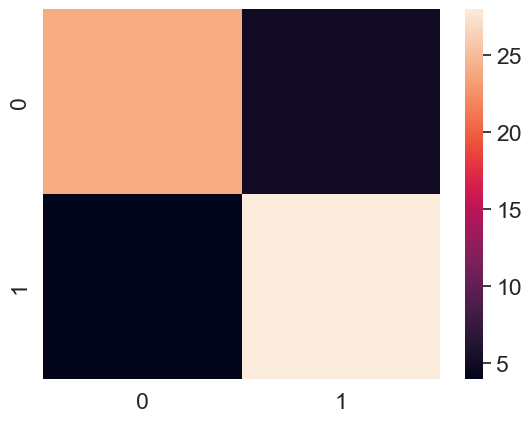

In [69]:
sns.heatmap(cm)

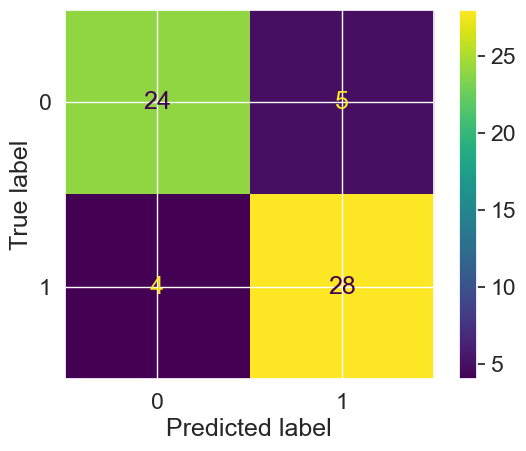

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## classification report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

